In [3]:
import pandas as pd
import numpy as np
import json
from polyglot.text import Text
from polyglot.downloader import downloader


In [41]:
tweets=pd.read_csv('datasets/facebook/allpost.csv', index_col=0)
tweets = tweets[~pd.isnull(tweets.message) ]

In [40]:
#tweets.sample(10)

,id,page_id,from_id,message,type,picture,story,link,link_name,link_description,...,likes_count,comments_count,entr_pg,entr_ug,object_id,status_type,source,is_hidden,application_id,place_id
1093,253275784726617,124955570892789,124955570892789,"""Well, the American people are the winners & t...",video,https://external.xx.fbcdn.net/safe\_image.php?...,NaN,http://video.msnbc.msn.com/the-ed-show/45395088,"Super committee fails, President blames Republ...",Video on msnbc.com: President Obama blamed Rep...,...,118.0,12,NaN,NaN,NaN,shared\_story,http://www.msnbc.msn.com/id/32545640/?launch=4...,0,NaN,NaN
870,124793280935644,124955570892789,124955570892789,"""Sen. Bernie Sanders, I – Vt., announced today...",link,NaN,NaN,http://vtdigger.org/2011/06/03/sanders-its-tim...,Video + story: Sanders proposes bill to end oi...,NaN,...,69.0,4,NaN,NaN,NaN,shared\_story,NaN,0,NaN,NaN
579,10152768129735725,153080620724,153080620724,“Being true to yourself and your work is an as...,status,NaN,NaN,NaN,NaN,NaN,...,6665.0,297,NaN,NaN,NaN,mobile\_status\_update,NaN,0,NaN,NaN
424,10152167529200725,153080620724,153080620724,The cast of the upcoming season of The Apprent...,photo,https://scontent.xx.fbcdn.net/hphotos-xaf1/v/t...,NaN,https://www.facebook.com/DonaldTrump/photos/a....,Timeline Photos,NaN,...,1308.0,379,NaN,NaN,1.015217e+16,added\_photos,NaN,0,NaN,NaN
1680,680072378714436,124955570892789,124955570892789,Sign Up for a Strategy Call with Sen. Bernie S...,link,NaN,NaN,http://moveon.org/pac/kochbros/Sen\_Sanders\_s...,MoveOn.org,"On July 9, 2014, beginning at 8:30 p.m. ET/5:3...",...,351.0,13,NaN,NaN,NaN,shared\_story,NaN,0,NaN,NaN
936,163138100413514,124955570892789,124955570892789,Bernie was on Ed Schultz's show last night (4/...,video,https://external.xx.fbcdn.net/safe\_image.php?...,NaN,http://www.msnbc.msn.com/id/42757863/displaymo...,The GOP’s war on Medicare,April 25: Sen. Bernie Sanders (I-VT) talks abo...,...,34.0,7,NaN,NaN,NaN,shared\_story,http://www.msnbc.msn.com/id/32545640/?launch=4...,0,NaN,NaN
729,10156636069435725,153080620724,153080620724,"1,400 workers in Indianapolis are informed tha...",link,https://external.xx.fbcdn.net/safe\_image.php?...,NaN,http://nypost.com/video/stomach-turning-moment...,"Stomach-turning moment 1,400 workers lost thei...","Here is the moment workers at Carrier Corp., a...",...,94341.0,9779,NaN,NaN,NaN,shared\_story,NaN,0,NaN,NaN
1300,365943463460664,124955570892789,124955570892789,VIDEO: Sen. Sanders talks with Bill Press abou...,link,https://external.xx.fbcdn.net/safe\_image.php?...,NaN,http://ow.ly/bovSb,Sen. Sanders on Wall Street Now: ‘Insane Gambl...,Sen. Sanders weighs in on the future of financ...,...,84.0,4,NaN,NaN,NaN,published\_story,NaN,0,1.833195e+11,NaN
1716,700510716670602,124955570892789,124955570892789,Join Bernie and Vermont's unions to celebrate ...,event,https://scontent.xx.fbcdn.net/hphotos-xpa1/v/t...,Bernie Sanders shared their event.,https://www.facebook.com/events/1510464305852129/,Middlebury: Join Bernie and Vermont Unions to ...,Join Bernie and Vermont's unions to celebrate ...,...,1742.0,52,NaN,NaN,1.510464e+15,shared\_story,NaN,0,NaN,NaN
781,10156663332415725,153080620724,153080620724,MAKE AMERICA GREAT AGAIN!,status,NaN,NaN,NaN,NaN,NaN,...,115229.0,6883,NaN,NaN,NaN,mobile\_status\_update,NaN,0,NaN,NaN


In [43]:
print len(tweets)

2182


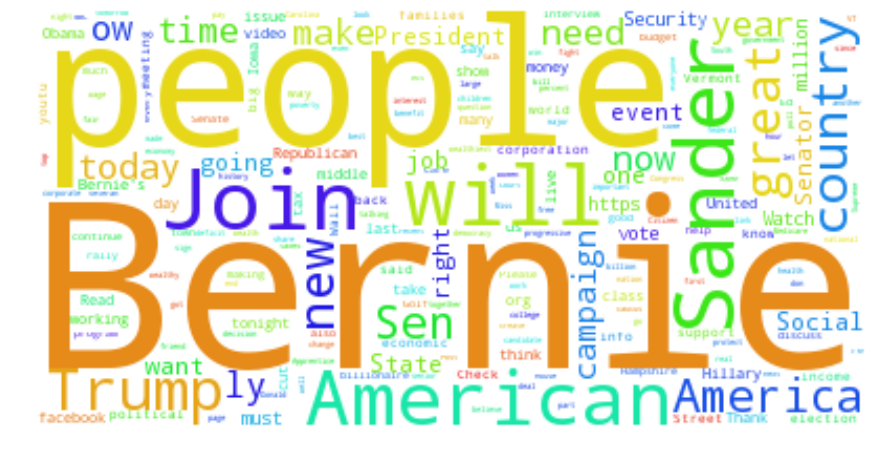

In [42]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
%matplotlib inline
text = " ".join([str(x) for x in tweets['message']])
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(15, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [44]:
def get_sentiment(e):
    try:
        pos=e.positive_sentiment
        neg=e.negative_sentiment
        return pos,neg
    except:
        return '',''

def map_entity(e):
    pos,neg=get_sentiment(e)
    return {'tag':e.tag,'entity':" ".join(e),'pos':pos,'neg':neg}

def get_entites(text):
    try:
        polyglot_text=Text(text)
        entities=polyglot_text.entities
        return map(map_entity,entities)
    except:
        return []
     
def map_to_data(tweet):
    user_name=tweet['user']['name']
    text=tweet['text']
    return {'text':text,'user':user_name,'entities':get_entites(text)}

In [45]:
tweets['entities']=tweets['message'].map(get_entites)

In [50]:

# 153080620724  = Donald Trump
# 124955570892789  = Sanders
# 889307941125736  = Clinton
mapp = { 153080620724: 'Donald Trump', 124955570892789: 'Bernie Sanders', 889307941125736: 'Hillary Clinton'}

#tweets['from_name'] = tweets['from_id'].map(mapp)
#del tweets['from_name']
tweets.insert(3, 'from_name', tweets['from_id'].map(mapp))
tweets.sample(5)

,id,page_id,from_id,from_name,message,type,picture,story,link,link_name,...,comments_count,entr_pg,entr_ug,object_id,status_type,source,is_hidden,application_id,place_id,entities
734,10156638734125725,153080620724,153080620724,Donald Trump,"1,300 Layoffs for Northeast Philly’s Cardone I...",link,https://external.xx.fbcdn.net/safe\_image.php?...,NaN,http://www.phillymag.com/business/2016/01/20/c...,"1,300 Layoffs Coming in Northeast Philly",...,7261,NaN,NaN,NaN,shared\_story,NaN,0,NaN,NaN,"[{u'neg': u'', u'tag': u'I-ORG', u'pos': u'', ..."
2355,996565600399969,889307941125736,889307941125736,Hillary Clinton,When Hillary’s mother Dorothy needed a champio...,video,https://scontent.xx.fbcdn.net/v/t15.0-10/s130x...,Hillary Clinton shared their video.,https://www.facebook.com/hillaryclinton/videos...,Hillary Clinton,...,517,NaN,NaN,NaN,shared\_story,https://video.xx.fbcdn.net/v/t42.1790-2/118456...,0,NaN,NaN,"[{u'neg': 0, u'tag': u'I-PER', u'pos': 0.97619..."
2420,1051269611596234,889307941125736,889307941125736,Hillary Clinton,"""From the time I met her 45 years ago this Mar...",photo,https://scontent.xx.fbcdn.net/v/t1.0-0/s130x13...,NaN,https://www.facebook.com/hillaryclinton/photos...,Timeline Photos,...,1437,NaN,NaN,1.051270e+15,added\_photos,NaN,0,NaN,NaN,"[{u'neg': 0, u'tag': u'I-PER', u'pos': 1.0, u'..."
814,10156680114785725,153080620724,153080620724,Donald Trump,Make sure you get on the Trump line and are no...,status,NaN,NaN,NaN,NaN,...,5876,NaN,NaN,NaN,mobile\_status\_update,NaN,0,NaN,NaN,"[{u'neg': 0.9375, u'tag': u'I-ORG', u'pos': 0,..."
436,10152181500970725,153080620724,153080620724,Donald Trump,Robert Pattinson should not take back Kristen ...,status,NaN,NaN,NaN,NaN,...,694,NaN,NaN,NaN,mobile\_status\_update,NaN,0,NaN,NaN,"[{u'neg': 0.890625, u'tag': u'I-PER', u'pos': ..."


In [72]:
tweets.groupby('from_name').count()['id']

from_name
Bernie Sanders     1172
Donald Trump        807
Hillary Clinton     201
Name: id, dtype: int64

In [67]:
print tweets.ix[814]['message']
print tweets.ix[814]['entities']

Make sure you get on the Trump line and are not mislead by the Cruz people. They are bad! BE CAREFUL!
[{'neg': 0.9375, 'tag': u'I-ORG', 'pos': 0, 'entity': u'Trump'}, {'neg': 0.95833333333333337, 'tag': u'I-LOC', 'pos': 0, 'entity': u'Cruz'}]


In [95]:

#downloader.download('ner2.sco',download_dir='/root/polyglot_data')

[polyglot_data] Error loading ner2.sco: Package u'ner2.sco' not found
[polyglot_data]     in index


False

In [52]:
entities = {}

In [126]:
# {for k, v tweets['entities']}

In [74]:
for row_id, tweet in tweets.iterrows():
    for ent in tweet['entities']:
        if ent['entity'] not in entities:
            entities.update({ent['entity']: {}})        

In [198]:
cands_map = {'Hillary': 'Hillary Clinton','HillaryClinton': 'Hillary Clinton', 'Hillary Clinton': 'Hillary Clinton', 'Clinton': 'Hillary Clinton', 
           'Donald Trump': 'Donald Trump', 'Donald': 'Donald Trump', 'Trump': 'Donald Trump','realDonaldTrump': 'Donald Trump',
           'Bernie Sanders': 'Bernie Sanders','BernieSanders':'Bernie Sanders', 'Bernie': 'Bernie Sanders', 'Sanders': 'Bernie Sanders'}

def check_if_candidate(x):
   if x in cands_map:
       return cands_map[x]
   else:
       return None

In [199]:
tweets.shape

(2182, 28)

In [81]:
#tweets = speeches_2016
candidate_col = 'from_name'
candidates = []
for row_id, tweet in tweets.iterrows():
   cand = tweet[candidate_col]
   for ent in tweet['entities']:
       e = ent['entity']
       pos=ent['pos']
       neg=ent['neg']
       if check_if_candidate(e):
            
           candidates.append((cand, check_if_candidate(e),"POS" if pos>neg else 'NEU' if pos=='' else 'NEG' ))
[x for x in candidates if x[0] != x[1]]

#print len(candidates)

[('Donald Trump', 'Hillary Clinton', 'POS'),
 ('Donald Trump', 'Hillary Clinton', 'NEU'),
 ('Donald Trump', 'Hillary Clinton', 'NEU'),
 ('Donald Trump', 'Hillary Clinton', 'NEU'),
 ('Donald Trump', 'Hillary Clinton', 'NEU'),
 ('Donald Trump', 'Bernie Sanders', 'NEG'),
 ('Donald Trump', 'Hillary Clinton', 'POS'),
 ('Bernie Sanders', 'Hillary Clinton', 'NEU'),
 ('Bernie Sanders', 'Hillary Clinton', 'POS'),
 ('Bernie Sanders', 'Hillary Clinton', 'POS'),
 ('Bernie Sanders', 'Hillary Clinton', 'POS'),
 (nan, 'Bernie Sanders', 'NEG'),
 (nan, 'Bernie Sanders', 'NEG'),
 (nan, 'Hillary Clinton', 'NEU'),
 ('Hillary Clinton', 'Donald Trump', 'NEU'),
 ('Hillary Clinton', 'Donald Trump', 'NEU'),
 ('Hillary Clinton', 'Donald Trump', 'POS'),
 ('Hillary Clinton', 'Bernie Sanders', 'NEG'),
 ('Hillary Clinton', 'Donald Trump', 'NEU')]

In [82]:
candidates


[('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEG'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'POS'),
 ('Donald Trump', 'Donald Trump', 'NEU'),
 ('Donald Trump', 'Donald Trump', 

In [108]:
candidates=pd.DataFrame(candidates)
candidates['sum']=1

In [189]:
candidatesGrouped=candidates.groupby([0,1,2]).sum()
rows=list(candidatesGrouped.iterrows())
denom=candidates.groupby([0]).sum()

In [190]:
candidatesGrouped.reset_index(inplace=True)  
denom.reset_index(inplace=True)

In [193]:
candidatesGrouped=pd.merge(candidatesGrouped,denom,on=0)
candidatesGrouped['percent']=candidatesGrouped['sum_x']/candidatesGrouped['sum_y']*100

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

{'Bernie Sanders': <matplotlib.text.Text at 0x7f14ebc77250>,
 'Donald Trump': <matplotlib.text.Text at 0x7f14ebd1e2d0>,
 'Hillary Clinton': <matplotlib.text.Text at 0x7f14ebc77650>}

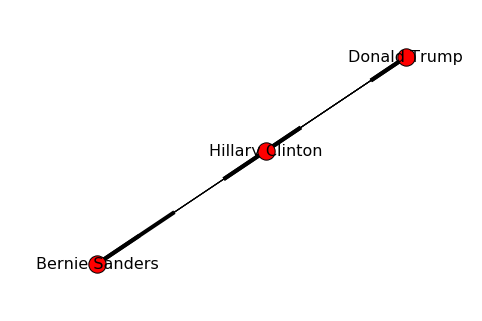

In [135]:
G=nx.MultiDiGraph()
G.add_node('Hillary Clinton')
G.add_node('Donald Trump')
G.add_node('Bernie Sanders')
for row in rows:
    weight=row[1]['sum']
    fromNode=row[0][0]
    toNode=row[0][1]
    G.add_edge(fromNode,toNode,weight=weight)
pos=nx.spring_layout(G) 
nx.draw(G,pos)
nx.draw_networkx_labels(G,pos,font_size=16)

In [201]:


!pip2 install twitter-text-python

/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:315: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
  Using cached twitter-text-python-1.1.0.tar.gz
  Running setup.py bdist_wheel for twitter-text-python ... - done
  Stored in directory: 